In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,InputLayer
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras import Input
from tensorflow.estimator import Estimator
from sklearn.utils.class_weight import compute_class_weight

TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'


def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, 'completed')
    return image_paths,labels


train = pd.DataFrame();
train['image'], train['label'] = createdataframe(TRAIN_DIR)


test = pd.DataFrame();
test['image'], test['label'] = createdataframe(TEST_DIR)


def extract_features(images):
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}  
    features = []

    for image_path in tqdm(images):
        image_path = os.path.normpath(image_path)

        # Skip non-image files
        if not os.path.splitext(image_path)[1].lower() in valid_extensions:
            print(f"Skipping non-image file: {image_path}")
            continue

        try:
            img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
            img = np.array(img)
            features.append(img)
        except Exception as e:
            print(f"Error loading {image_path}: {e}")
            continue

    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


train_features = np.load('train_features.npy')
test_features = np.load('test_features.npy')


x_train = train_features/255.0
x_test = test_features/255.0



le = LabelEncoder()
le.fit(train['label'])


y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))


y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)



# convolutional layers

model = Sequential()
model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


from keras.models import model_from_json


label = ['angry','disgust','fear','happy','neutral','sad','surprise']


def ef(image):
    img = load_img(image,color_mode = 'grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0




angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [34]:
train_features = extract_features(train['image'])
test_features  = extract_features(test['image'])

np.save('train_features.npy', train_features)
np.save('test_features.npy', test_features)


  0%|          | 0/28709 [00:00<?, ?it/s]

  0%|          | 0/7178 [00:00<?, ?it/s]

In [35]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 7)
x_test shape: (7178, 48, 48, 1)
y_test shape: (7178, 7)


In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [39]:
history = model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Train on 28709 samples, validate on 7178 samples
Epoch 1/100
28709/28709 [==============================] - 17s 587us/step - loss: 1.9342 - accuracy: 0.2321 - val_loss: 2.5157 - val_accuracy: 0.2471
Epoch 2/100
28709/28709 [==============================] - 16s 565us/step - loss: 1.8192 - accuracy: 0.2481 - val_loss: 1.8895 - val_accuracy: 0.2471
Epoch 3/100
28709/28709 [==============================] - 16s 562us/step - loss: 1.8139 - accuracy: 0.2504 - val_loss: 1.8223 - val_accuracy: 0.2471 0.25
Epoch 4/100
28709/28709 [==============================] - 16s 565us/step - loss: 1.8125 - accuracy: 0.2510 - val_loss: 1.8074 - val_accuracy: 0.2471
Epoch 5/100
28709/28709 [==============================] - 17s 590us/step - loss: 1.8121 - accuracy: 0.2510 - val_loss: 1.8222 - val_accuracy: 0.2471
Epoch 6/100
28709/28709 [==============================] - 16s 564us/step - loss: 1.8125 - accuracy: 0.2509 - val_loss: 1.8481 - val_accuracy: 0.2471
Epoch 7/100
28709/28709 [=====================

Epoch 55/100
28709/28709 [==============================] - 16s 560us/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8132 - val_accuracy: 0.2471
Epoch 56/100
28709/28709 [==============================] - 16s 563us/step - loss: 1.8107 - accuracy: 0.2513 - val_loss: 1.8133 - val_accuracy: 0.2471
Epoch 57/100
28709/28709 [==============================] - 531s 18ms/step - loss: 1.8103 - accuracy: 0.2513 - val_loss: 1.8134 - val_accuracy: 0.2471
Epoch 58/100
28709/28709 [==============================] - 16s 574us/step - loss: 1.8103 - accuracy: 0.2513 - val_loss: 1.8134 - val_accuracy: 0.2471
Epoch 59/100
28709/28709 [==============================] - 16s 552us/step - loss: 1.8182 - accuracy: 0.2513 - val_loss: 1.8131 - val_accuracy: 0.2471
Epoch 60/100
28709/28709 [==============================] - 16s 553us/step - loss: 1.8104 - accuracy: 0.2513 - val_loss: 1.8135 - val_accuracy: 0.2471
Epoch 61/100
28709/28709 [==============================] - 16s 563us/step - loss: 1.8103 - ac

In [40]:
model_json = model.to_json()
with open("Emotiondetector.json","w") as json_file:
    json_file.write(model_json)
model.save("Emotiondetector.h5")

original image is of angry
model prediction is  happy


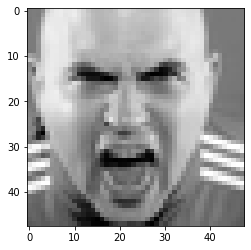

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


image = 'images/train/angry/im3.png'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [45]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")


Test Accuracy: 24.71%


In [46]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)   # predicted labels
y_true = np.argmax(y_test, axis=1)           # actual labels

print("Accuracy:", accuracy_score(y_true, y_pred_classes) * 100, "%")


Accuracy: 24.714405126776263 %
